### 1. Load molecule

In [1]:
from qdk_chemistry import Molecule

In [2]:
caffeine = Molecule.from_xyz("data/caffeine.xyz")

In [3]:
cat "data/caffeine.xyz"

24
Caffeine
H      -3.3804130    -1.1272367     0.5733036
N       0.9668296    -1.0737425    -0.8198227
C       0.0567293     0.8527195     0.3923156
N      -1.3751742    -1.0212243    -0.0570552
C      -1.2615018     0.2590713     0.5234135
C      -0.3068337    -1.6836331    -0.7169344
C       1.1394235     0.1874122    -0.2700900
N       0.5602627     2.0839095     0.8251589
O      -0.4926797    -2.8180554    -1.2094732
C      -2.6328073    -1.7303959    -0.0060953
O      -2.2301338     0.7988624     1.0899730
H       2.5496990     2.9734977     0.6229590
C       2.0527432    -1.7360887    -1.4931279
H      -2.4807715    -2.7269528     0.4882631
H      -3.0089039    -1.9025254    -1.0498023
H       2.9176101    -1.8481516    -0.7857866
H       2.3787863    -1.1211917    -2.3743655
H       1.7189877    -2.7489920    -1.8439205
C      -0.1518450     3.0970046     1.5348347
C       1.8934096     2.1181245     0.4193193
N       2.2861252     0.9968439    -0.2440298
H      -0.1687028     

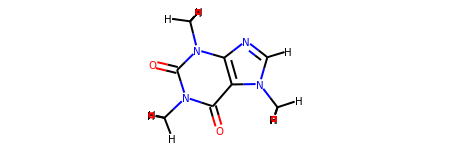

In [4]:
caffeine.mol

In [5]:
type(caffeine.mol)

rdkit.Chem.rdchem.Mol

In [6]:
caffeine.smiles

'[H]Cn1c(=O)c2c(ncn2C)n(C)c1=O'

In [7]:
caffeine.num_electrons

102

In [8]:
caffeine.atoms

[1, 6, 7, 8]

In [51]:
pattern = "#BASIS SET: \([\d[spdf]*[,]*]*\) -> \[((\d)([spdf])*[,]*)*\]\n(\w+)"

In [52]:
import re

In [53]:
re.findall(pattern, basis)

[('1s', '1', 's', 'H')]

In [166]:
import basis_set_exchange as bse

# Obtain the STO-3G basis set in nwchem format (as a string) for hydrogen and carbon
basis = bse.get_basis('STO-3G', elements=caffeine.atoms, fmt='nwchem')

In [168]:
re.findall("-> \[(\d*[spdf],*\d*[spdf]*,*\d*[spdf]*)\]\n(\w+)", basis)

[('1s', 'H'), ('2s,1p', 'C'), ('2s,1p', 'N'), ('2s,1p', 'O')]

#### Create NWChem input file

In [14]:
caffeine.create_input(
    "caffeine", 
    "data/caffeine.nw", 
    solver="nwchem",
    num_active_orbitals=80,
    num_active_el=102
)

'./data/caffeine.nw'

In [15]:
cat './data/caffeine.nw'


start caffeine

echo
memory stack 1000 mb heap 100 mb global 1000 mb noverify

geometry units au
symmetry c1
H -1.6361564747994686 3.018292114901333 -1.456895683246307
N -1.5157636450975738 -0.7185143912632502 -0.04156806304513151
C 0.8058315025934746 -0.16450929221604926 0.09588391928942556
N -0.7619581615772606 1.5425120958116945 -0.2779413519909288
C 0.5891807412545974 1.2246061357002906 -0.11148594679729994
C -1.8325413226393594 0.6239659603448647 -0.25179419508992884
C -0.20135746611114919 -1.0805072443000097 0.12747987310851724
N 1.946213475906592 -0.8876357978354701 0.2977852452692874
O -2.9970934100977398 1.0028603553481963 -0.40942089570202334
C -1.1151151897353606 2.9313333952997094 -0.4977499463120713
O 1.5042766923301956 2.0421694476658794 -0.13821075917745576
H 2.280415469643988 -2.9972906871024385 0.6131853071417465
C -2.558790597134906 -1.7270397382021516 -0.0007473173209522081
H -1.796409657372379 3.2549778673574115 0.29603725942485565
H -0.24378732575229284 3.59071802

### 2. Convert to Broombridge using POST request to EMSL Arrows

In [18]:
caffeine.to_broombridge(file_path="data/caffeine.yaml", url="https://arrows.emsl.pnnl.gov/api/broombridge/")

In [19]:
cat data/caffeine.yaml

$schema: https://raw.githubusercontent.com/Microsoft/Quantum/master/Chemistry/Schema/broombridge-0.1.schema.json
format: {version: '0.1'}
generator: {source: nwchem, version: '6.8'}
integral_sets:
- basis_set: {name: sto-3g, type: gaussian}
  coulomb_repulsion: {units: hartree, value: 929.3750693761446}
  energy_offset: {units: hartree, value: 0.0}
  fci_energy: {lower: 0.0, units: hartree, upper: 0.0, value: 0.0}
  geometry:
    atoms:
    - coords: [-3.01049459, 1.70509805, -0.00287664]
      name: C
    - coords: [-1.55451359, 1.65801005, -0.00308664]
      name: N
    - coords: [-0.70237259, 2.70721005, -0.00440764]
      name: C
    - coords: [0.57713141, 2.35269805, -0.00394964]
      name: N
    - coords: [0.53763041, 0.99727505, -0.00215464]
      name: C
    - coords: [-0.75617759, 0.52662905, -0.00157564]
      name: C
    - coords: [-1.08542359, -0.86328495, 0.00088936]
      name: C
    - coords: [-2.21226559, -1.33949695, 0.00054036]
      name: O
    - coords: [0.07802241

In [9]:
pyridine = Molecule.from_xyz("data/pyridine.xyz")
pyridine

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

In [ ]:
pyridine.to_broombridge(file_path="data/pyridine.yaml", url="https://arrows.emsl.pnnl.gov/api/broombridge/")

In [ ]:
cat data/pyridine.yaml

### 3. Load Broombridge and simulate in Q#

In [ ]:
import qsharp
qsharp.reload()

from QDK.Chemistry.Trotterization import GetEnergyByTrotterization

In [ ]:
from qsharp_chemistry import load_and_encode

### Caffeine

In [ ]:
encoded_data_caffeine = load_and_encode("data/caffeine.yaml")

In [ ]:
%%time
GetEnergyByTrotterization.estimate_resources(
    JWEncodedData=encoded_data_caffeine, 
    nBitsPrecision=7,
    trotterStepSize=0.4, 
    trotterOrder=1)

### Pyridine

In [ ]:
encoded_data_pyridine = load_and_encode("data/pyridine.yaml")

In [ ]:
%%time
GetEnergyByTrotterization.estimate_resources(
    JWEncodedData=encoded_data_pyridine, 
    nBitsPrecision=7,
    trotterStepSize=0.4, 
    trotterOrder=1)